<a href="https://colab.research.google.com/github/RubenMcCarty/Deep-Learning/blob/main/Lab_03_IMDB_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB dataset** 
# Algoritmo para predecir las criticas positivas y negativas de películas de IMDB
##  Creado por [M.Sc. Ruben Quispe](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
### Curso [Machine Learning](https://eie.pe/curso-machine-learning/)

La base de datos IMDB (Internet Movie Database), se compone de 50,000 críticas de películas, donde 25,000 críticas conforman el conjunto de entrenamiento y 25,000 constituyen el conjunto de prueba. En cada conjunto, el 50% de las críticas son positivas y el restante 50% son negativas. Sitio web de IMDB: https://www.imdb.com/<br>
La base de datos IMDB viene precargada en Keras:

El conjunto de datos de IMDB
Trabajaremos con el "conjunto de datos IMDB", un conjunto de 50.000 reseñas muy polarizadas de Internet Movie Database. Se dividen en 25.000 revisiones para capacitación y 25.000 revisiones para pruebas, cada conjunto consta de un 50% de críticas negativas y un 50% de críticas positivas.

¿Por qué tenemos estos dos conjuntos de prueba y entrenamiento separados? ¡Nunca debe probar un modelo de Machine Learning con los mismos datos que utilizó para entrenarlo! El hecho de que un modelo tenga un buen rendimiento en sus datos de entrenamiento no significa que funcionará bien en datos que nunca ha visto, y lo que realmente le importa es el rendimiento de su modelo en datos nuevos (dado que ya conoce las etiquetas de sus datos de entrenamiento - obviamente no necesita su modelo para predecirlos). Por ejemplo, es posible que su modelo termine simplemente memorizando un mapeo entre sus muestras de entrenamiento y sus objetivos, lo que sería completamente inútil para la tarea de predecir objetivos para datos nunca antes vistos. Repasaremos este punto con mucho más detalle en el próximo capítulo.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB viene empaquetado con Keras. Ya ha sido preprocesado: las revisiones (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica en un diccionario.

El siguiente código cargará el conjunto de datos (cuando lo ejecute por primera vez, se descargarán aproximadamente 80 MB de datos en su máquina):

In [51]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

El argumento num_word=10000, indica que sólo se tomarán en cuenta las 10,000 palabras más usuales dentro de la base de datos, esto con la intención de tener instancias de un tamaño más manejable.

train_data y test_data son listas de críticas, donde cada crítica se compone de valores enteros, los cuales son el índice de alguna palabra en particular. Por su parte, train_labels y test_labels, son listas de 0's y 1's, donde 0 representa que la crítica es negativa y 1 que es positiva.

In [52]:
train_data[20000]

[1,
 6,
 185,
 255,
 2478,
 39,
 4,
 2,
 15,
 59,
 9,
 6,
 1985,
 448,
 725,
 6,
 223,
 1795,
 7,
 35,
 2,
 3612,
 7,
 5,
 556,
 18,
 9781,
 112,
 31,
 688,
 8,
 41,
 501,
 2199,
 34,
 349,
 59,
 4136,
 4,
 4281,
 2,
 5,
 880,
 4,
 349,
 59,
 892,
 1454,
 11,
 119,
 19,
 6,
 243,
 132,
 41,
 113,
 739,
 8,
 193,
 6,
 471,
 18,
 4,
 128,
 54,
 59,
 9,
 3540,
 5,
 41,
 1461,
 9,
 556,
 34,
 6,
 1143,
 7,
 3959,
 9266,
 174,
 34,
 134,
 2484,
 687,
 4,
 255,
 1747,
 8,
 41,
 1115,
 771,
 5,
 4846,
 1060,
 23,
 4,
 3959,
 1793,
 8,
 4,
 288,
 2,
 3935,
 10,
 10,
 2,
 2,
 2,
 1080,
 2,
 2,
 778,
 19,
 368,
 6073,
 2,
 2,
 837,
 34,
 2,
 1976,
 2,
 2,
 37,
 17,
 2,
 2,
 2,
 2251,
 59,
 9,
 6,
 1985,
 4,
 2,
 173,
 9,
 54,
 4,
 370,
 4110,
 978,
 968,
 200,
 41,
 2977,
 4,
 636,
 2763,
 2672,
 41,
 8557,
 2,
 16,
 242,
 6,
 2,
 1664,
 1563,
 2,
 9,
 472,
 24,
 6,
 1985,
 59,
 9,
 1533,
 6,
 55,
 565,
 7472,
 10,
 10,
 17,
 6,
 22,
 1985,
 255,
 11,
 631,
 62,
 28,
 77,
 128,
 48,
 2,
 109,
 6

In [53]:
len(train_data[1786]) # Cuantas palabras tiene la critica co indice 1786 tiene 113 palabras

113

In [54]:
train_labels[51] #La crítica 51 del conjunto de entrenamiento es negativa. 0 es negatiga y 1 es positiva

0

Dado que establecimos la restricción de utilizar solamente las 10,000 palabras más usuales, ninguno de los índices que constituyen cada crítica, puede tener un valor mayor a 10,000:

In [55]:
max([max(sequence) for sequence in train_data])

9999

El código siguiente permite decodificar las críticas:

In [56]:
#word_index es un diccionario que permite mapear cada palabra a su respectivo índice
word_index = imdb.get_word_index()
# Aplicamos la operación inversa, es decir, mapeamos de índices a palabras.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #dict significa dictionary, y te devuelve una lista de tuplas pares, donde
#el primer valor de la lista, representa la clave o ID, y el segundo valor denota el valor de dicha clave.
# Procedemos a decodificar la crítica. La razón por la que a cada índice le restamos 3, es
#porque 0, 1 y 2 son índices reservados para los valores de "padding", "comienzo de la secuencia" y "desconocido".
# El argumento "?" se regresa en caso de que el índice en cuestión no tenga asociado ninguna palabra.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[15678]])

In [57]:
decoded_review

"? as much as i have enjoyed the hanzo the razor movies three is definitely enough ? got the gold ' the final adventure for the japanese ? with the impressive package is a fairly enjoyable piece of ? cinema but offers little new in terms of ideas whilst taking a big step backwards as far as ? is concerned br br the film opens with the appearance of a female ghost and looks as though it is going to explore supernatural territory something which might have taken the series in an interesting new direction unfortunately after the ? turns out to be nothing but a scooby doo style ? ? up by a corrupt ? official keen to keep people away from the lake where he is hiding stolen gold director ? ? is content to ? familiar elements from the first two films the result being a rather stale affair br br once again hanzo heads an investigation that requires him to ? women through the use of his mighty penis slice up his enemies and abuse his superiors on the way we get wild ? good natured rape hanzo fo

# **Preparando los datos**
No podemos alimentar listas de números enteros en una red neuronal. Tenemos que convertir nuestras listas en tensores. Hay dos formas de hacerlo:

Podríamos rellenar nuestras listas para que todas tengan la misma longitud y convertirlas en un tensor de forma entero (muestras, índices_de_palabras), luego usar como primera capa en nuestra red una capa capaz de manejar tales tensores enteros (la capa Embedding que cubriremos en detalle más adelante en el libro).
Podríamos codificar en caliente nuestras listas para convertirlas en vectores de 0 y 1. Concretamente, esto significaría, por ejemplo, convertir la secuencia [3, 5] en un vector de 10,000 dimensiones que sería todo ceros excepto los índices 3 y 5, que serían unos. Entonces podríamos usar como primera capa en nuestra red una capa Densa, capaz de manejar datos vectoriales de punto flotante.
Iremos con la última solución. Vectoricemos nuestros datos, lo que haremos manualmente para mayor claridad.

# **Preprocesamiento de los datos**

Aplicamos el enfoque de one-hot encoding a los datos de entrada. Por ejemplo, si una de nuestras instancias se representa por la lista [2, 7, 15], al aplicar one-hot encoding, dicha lista se convertirá en un vector de 10,000 elementos, donde a los índices 2, 7 y 15, se les asignará el valor de 1. En el problema que estamos abordando, todas las listas de críticas se transforman en vectores de 10,000 elementos, debido a que el número máximo de palabras que se están considerando, son 10,000. <br>
La razón por la que se aplica esta operación en los datos de entrada, es porque las redes neuronales convolucionales no reciben como entrada listas de valores, sino tensores.<br>
Ejemplo:

**Crítica -> [2, 7, 15]** <br>
**One-hot encoding de la crítica -> [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ... , 0]** <br>
**Crítica -> [9, 7, 1, 2, 7]** <br>
**One-hot encoding de la crítica -> [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ... , 0]**

In [58]:
for i in range (5):
  print(len(train_data[i]))

218
189
141
550
147


In [59]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #sequences se refiere al conjunto de críticas
    # Creamos matrices de ceros con dimensiones (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) #-> 25,000 X 10,000
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # le asignamos el valor de uno al índice correspondiente
    return results

# Conjunto de entrenamiento vectorizado/one-hote encoding
x_train = vectorize_sequences(train_data)
# Conjunto de prueba vectorizado/one-hote encoding
x_test = vectorize_sequences(test_data)

In [60]:
x_train[23976]

array([0., 1., 1., ..., 0., 0., 0.])

In [61]:
len(x_train[12])

10000

In [62]:
x_train[1].shape

(10000,)

In [63]:
x_train.shape

(25000, 10000)

In [64]:
x_train[15879]

array([0., 1., 1., ..., 0., 0., 0.])

También convertimos las etiquetas en tensores:

In [65]:
# Etiquetas vectorizadas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [66]:
y_train[3]

1.0

# **Construcción de la red neuronal**
Nuestros datos de entrada son simplemente vectores y nuestras etiquetas son escalares (1 y 0): esta es la configuración más fácil que encontrará. Un tipo de red que funciona bien en un problema de este tipo sería una simple stack de capas completamente conectadas (densas) con activaciones de relu: Densa (16,
activación = 'relu')

El argumento que se pasa a cada capa Densa (16) es el número de "unidades ocultas" de la capa. ¿Qué es una unidad oculta? Es una dimensión en el espacio de representación de la capa. Puede recordar del capítulo anterior que cada capa Densa con una activación relu implementa la siguiente cadena de operaciones de tensor:

output = relu (dot (W, input) + b)

Tener 16 unidades ocultas significa que la matriz de peso W tendrá forma (input_dimension, 16), es decir, el producto escalar con W proyectará los datos de entrada en un espacio de representación de 16 dimensiones (y luego agregaríamos el vector de sesgo by aplicaríamos el operación relu). Puede entender intuitivamente la dimensionalidad de su espacio de representación como "cuánta libertad está permitiendo que tenga la red cuando aprende representaciones internas". Tener más unidades ocultas (un espacio de representación de mayor dimensión) permite que su red aprenda representaciones más complejas, pero hace que su red sea más costosa computacionalmente y puede conducir al aprendizaje de patrones no deseados (patrones que mejorarán el rendimiento en los datos de entrenamiento pero no en el datos de prueba).

Hay dos decisiones de arquitectura clave que se deben tomar sobre dicha stack de capas densas:

* Cuántas capas usar.
* Cuántas "unidades ocultas" elegir para cada capa.

En el próximo capítulo, aprenderá los principios formales que lo guiarán al tomar estas decisiones. Por el momento, tendrá que confiarnos la siguiente elección de arquitectura: dos capas intermedias con 16 unidades ocultas cada una, y una tercera capa que generará la predicción escalar con respecto al sentimiento de la revisión actual. Las capas intermedias utilizarán relu como su "función de activación", y la capa final utilizará una activación sigmoid para generar una probabilidad (una puntuación entre 0 y 1, que indica la probabilidad de que la muestra tenga el objetivo "1", es decir, qué tan probable es que la revisión sea positiva). Un relu (unidad lineal rectificada) es una función destinada a poner a cero los valores negativos, mientras que un sigmoid "squashes-aplasta" valores arbitrarios en el intervalo [0, 1], generando así algo que se puede interpretar como una probabilidad.

Así es como se ve nuestra red


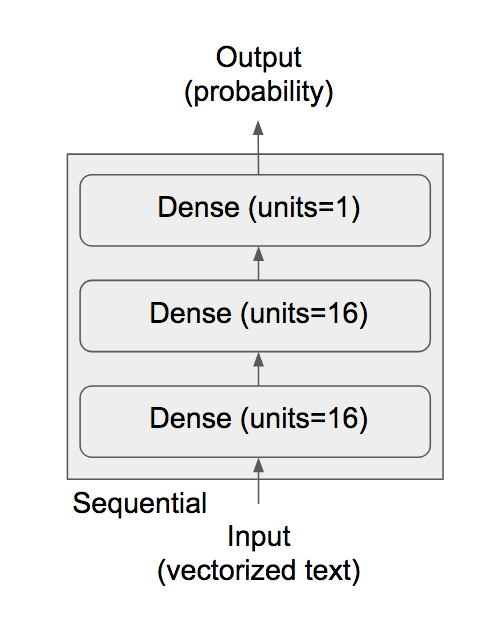

In [67]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #Capa oculta 1 - input_shape puede verse como una representación implícita de la capa de entrada
model.add(layers.Dense(16, activation='relu'))# Capa oculta 2
model.add(layers.Dense(1, activation='sigmoid'))#Capa de salida

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# **Compilación**

Por último, debemos elegir una función de pérdida y un optimizador. Dado que nos enfrentamos a un problema de clasificación binaria y la salida de nuestra red es una probabilidad (terminamos nuestra red con una capa de una sola unidad con una activación sigmoid), es mejor usar la pérdida de binary_crossentropy. No es la única opción viable: podría usar, por ejemplo, mean_squared_error. Pero la entropía cruzada suele ser la mejor opción cuando se trata de modelos que generan probabilidades. La entropía cruzada es una cantidad del campo de la Teoría de la Información, que mide la "distancia" entre las distribuciones de probabilidad, o en nuestro caso, entre la distribución de verdad fundamental y nuestras predicciones.

Aquí está el paso en el que configuramos nuestro modelo con el optimizador rmsprop y la función de pérdida binary_crossentropy. Tenga en cuenta que también controlaremos la precisión durante el entrenamiento.

In [69]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #Es una variación del descenso de gradiente
              loss='binary_crossentropy', #Se relaciona a la función de error 
              metrics=['accuracy'])

# **Validación**

Buscando evaluar el rendimiento del modelo durante la fase de entrenamiento, construimos el conjunto de validación a partir del conjunto de entrenamiento.

In [70]:
#Instancias
x_val = x_train[:10000] #Instancias de validación
#x_val = x_train[0:10000]
partial_x_train = x_train[10000:] #Instancias de entrenamiento
#partial_x_train = x_train[10000:25000] #Instancias de entrenamiento

#Etiquetas
y_val = y_train[:10000] #Etiquetas de validación  
#y_val = y_train[0:10000] #Etiquetas de validación  
partial_y_train = y_train[10000:] #Etiquetas de entrenamiento
#partial_y_train = y_train[10000:25000] #Etiquetas de entrenamiento

In [71]:
#Conjunto de entrenamiento
len(partial_x_train)

15000

In [72]:
#Conjunto de validación
len(x_val)

10000

# **Entrenamiento**
Ahora entrenaremos nuestro modelo durante 20 épocas (20 iteraciones sobre todas las muestras en los tensores x_train e y_train), en mini lotes de 512 muestras. Al mismo tiempo, monitorearemos la pérdida y precisión de las 10,000 muestras que separamos. Esto se hace pasando los datos de validación como el argumento validation_data:

In [73]:
epochs_num = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs_num,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5925 - accuracy: 0.6958 - val_loss: 0.4028 - val_accuracy: 0.8546
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3327 - accuracy: 0.8977 - val_loss: 0.3263 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2377 - accuracy: 0.9223 - val_loss: 0.2909 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1820 - accuracy: 0.9406 - val_loss: 0.2750 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1438 - accuracy: 0.9575 - val_loss: 0.3041 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1151 - accuracy: 0.9683 - val_loss: 0.3194 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0994 - accuracy: 0.9719 - val_loss: 0.3064 - val_accuracy: 0.8836
Epoch 8/20
30

Podemos ver que la llamada al método fit(), genera un objeto History, el cual tiene un miembro history, que a su vez es un diccionario que contiene información acerca de todo el proceso de entrenamiento.

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Graficamos el desempeño de la red neuronal durante la fase de entrenamiento. A continuación se muestra la comparación entre la pérdida que ocurre en el conjunto de entrenamiento y la pérdida relacionada al conjunto de validación. 

Best accuracy epoch  4
Best loss epoch  4


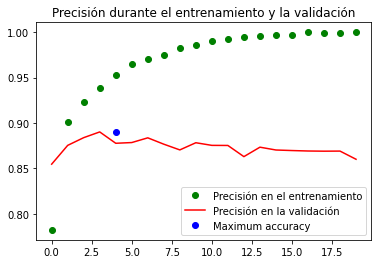

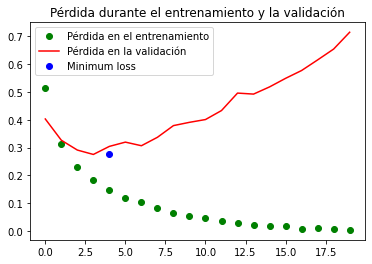

In [75]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

#Precisión
plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch ', max_val_acc_epoch)
plt.figure()

#Pérdida
plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

Con base a las gráficas previas, podemos observar que, aproximadamente a partir de la época 4, el modelo deja de mejorar y comienza a presentarse una disminución en su rendimiento.

Los puntos son la pérdida y la precisión del entrenamiento, mientras que las líneas continuas son la pérdida y la precisión de la validación. Tenga en cuenta que sus propios resultados pueden variar ligeramente debido a una inicialización aleatoria diferente de su red.

Como puede ver, la pérdida de entrenamiento disminuye con cada época y la precisión del entrenamiento aumenta con cada época. Eso es lo que esperaría al ejecutar la optimización del descenso de gradientes: la cantidad que está tratando de minimizar debería disminuir con cada iteración. Pero ese no es el caso de la pérdida y precisión de la validación: parecen alcanzar su punto máximo en la cuarta época. Este es un ejemplo de lo que advertimos anteriormente: un modelo que se desempeña mejor en los datos de entrenamiento no es necesariamente un modelo que lo hará mejor en datos que nunca antes había visto. En términos precisos, lo que está viendo es "sobreajuste": después de la segunda época, estamos optimizando en exceso los datos de entrenamiento y terminamos aprendiendo representaciones que son específicas de los datos de entrenamiento y no se generalizan a datos fuera del conjunto de entrenamiento.

En este caso, para evitar un sobreajuste, simplemente podríamos dejar de entrenar después de tres épocas. En general, existe una variedad de técnicas que puede aprovechar para mitigar el sobreajuste, que trataremos en el próximo capítulo.

Entrenemos una nueva red desde cero durante cuatro épocas, luego evaluémosla en nuestros datos de prueba:

# **Overfitting - Sobreajuste:**<br>
Esto ocurre cuando el desempeño del modelo en el conjunto de entrenamiento es superior al rendimiento del mismo modelo en el conjunto de validación.<br>
Para mitigar el overfitting, debemos buscar que el rendimiento del modelo tanto en el conjunto de entrenamiento como en el conjunto de validación, sea similar y con valores apropiados.

# **Re-entrenamiento y evaluación del modelo final** 

Una vez que se seleccionó el modelo tomando como base el rendimiento de este en el conjunto de validación, una práctica recomendada es volver a entrar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamiento original, es decir, integrado el conjunto de validación al conjunto de entrenamiento "parcial". 



In [76]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 2s 27ms/step - loss: 0.5389 - accuracy: 0.7457
Epoch 2/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2624 - accuracy: 0.9098
Epoch 3/5
49/49 [==============================] - 1s 30ms/step - loss: 0.2003 - accuracy: 0.9310
Epoch 4/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1600 - accuracy: 0.9470
Epoch 5/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1395 - accuracy: 0.9543


In [77]:
#Evaluamos el modelo final
loss_test, acc_test = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8776


In [78]:
print(loss_test, acc_test)

0.3155401647090912 0.8776000142097473


# **Predicciones del modelo final**

Luego de generar un modelo apropiado para clasificar críticas, podemos usarlo para predecir la probabilidad de que cada nueva crítica que sea leída por el modelo, se clasifique como positiva o negativa. Este proceso predictivo es muy importante, ya que así es como se desplegaría esta red neuronal en "la vida real", es decir, en algún servicio de consumo.

In [79]:
model.predict(x_test)

array([[0.16103575],
       [0.99998116],
       [0.8454529 ],
       ...,
       [0.1104224 ],
       [0.06396174],
       [0.5913146 ]], dtype=float32)

In [80]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

# **Experimentos adicionales**
* Usamos 2 capas ocultas. Intente usar 1 o 3 capas ocultas y vea cómo afecta la validación y la precisión de la prueba.
* Intenta utilizar capas con unidades más ocultas o unidades menos ocultas: 32 unidades, 64 unidades ...
* Intente utilizar la función de pérdida mse en lugar de binary_crossentropy.
* Intente usar la activación tanh (una activación que era popular en los primeros días de las redes neuronales) en lugar de relu.

Estos experimentos lo ayudarán a convencerse de que las elecciones de arquitectura que hemos realizado son bastante razonables, ¡aunque aún se pueden mejorar!

# **Conclusiones**
Esto es lo que debe sacar de este ejemplo:

* Por lo general, es necesario realizar un poco de preprocesamiento en sus datos sin procesar para poder alimentarlos, como tensores, en una red neuronal.En el caso de secuencias de palabras, se pueden codificar como vectores binarios, pero también existen otras opciones de codificación.
* Los stacks de capas densas con activaciones de relu pueden resolver una amplia gama de problemas (incluida la clasificación de sentimientos), y es probable que las use con frecuencia.
* En un problema de clasificación binaria (dos clases de salida), su red debe terminar con una capa densa con 1 unidad y una activación sigmoidea, es decir, la salida de su red debe ser un escalar entre 0 y 1, codificando una probabilidad.
* Con tal salida sigmoide escalar, en un problema de clasificación binaria, la función de pérdida que debe usar es binary_crossentropy.
* El optimizador rmsprop es generalmente una buena opción de optimizador, sea cual sea su problema. Eso es una cosa menos de la que debe preocuparse.
* A medida que mejoran sus datos de entrenamiento, las redes neuronales eventualmente comienzan a sobreajustarse y terminan obteniendo resultados cada vez peores en datos nunca antes vistos. Asegúrese de supervisar siempre el rendimiento de los datos que están fuera del conjunto de entrenamiento.